In [30]:
import colour
import numpy as np

from negative_film.kodak_5207 import Kodak5207

In [31]:
kodak = Kodak5207()

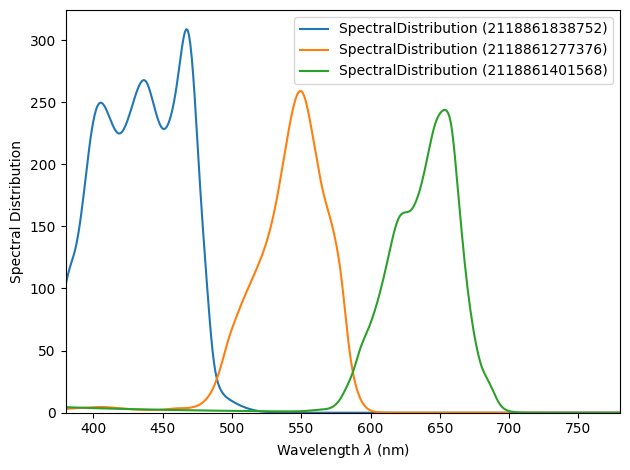

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Wavelength $\\lambda$ (nm)', ylabel='Spectral Distribution'>)

In [32]:
colour.plotting.plot_multi_sds((kodak.yellow_sensitivity, kodak.magenta_sensitivity, kodak.cyan_sensitivity))

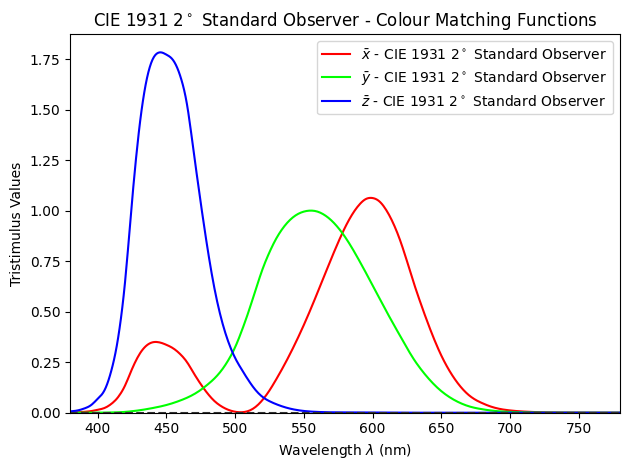

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'CIE 1931 2$^\\circ$ Standard Observer - Colour Matching Functions'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Tristimulus Values'>)

In [33]:
xyz_cmfs = colour.MSDS_CMFS["CIE 1931 2 Degree Standard Observer"].align(colour.SPECTRAL_SHAPE_DEFAULT)

colour.plotting.plot_single_cmfs(xyz_cmfs)

In [34]:
A = xyz_cmfs.values

In [35]:
E = A @ np.linalg.inv(A.T @ A)

In [36]:
xyz_cmfs_dual = colour.MultiSpectralDistributions(E, colour.SPECTRAL_SHAPE_DEFAULT)

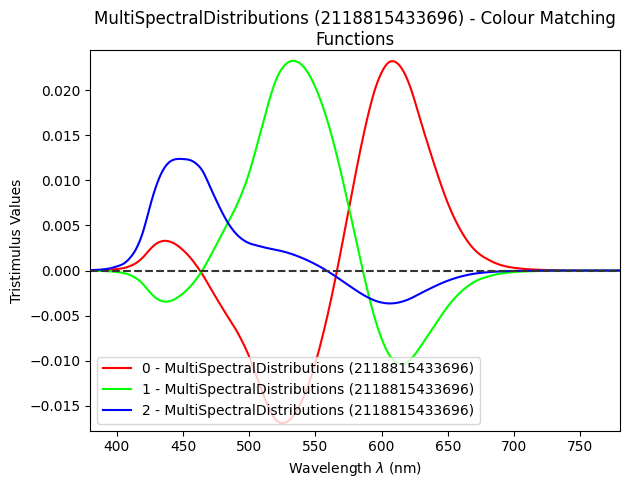

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'MultiSpectralDistributions (2118815433696) - Colour Matching Functions'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Tristimulus Values'>)

In [37]:
colour.plotting.plot_single_cmfs(xyz_cmfs_dual)

In [38]:
D65_XYZ = colour.xyY_to_XYZ([0.3127, 0.329, 1])
D65_XYZ

array([ 0.95045593,  1.        ,  1.08905775])

In [39]:
reconstructed = colour.SpectralDistribution(E @ D65_XYZ, colour.SPECTRAL_SHAPE_DEFAULT)

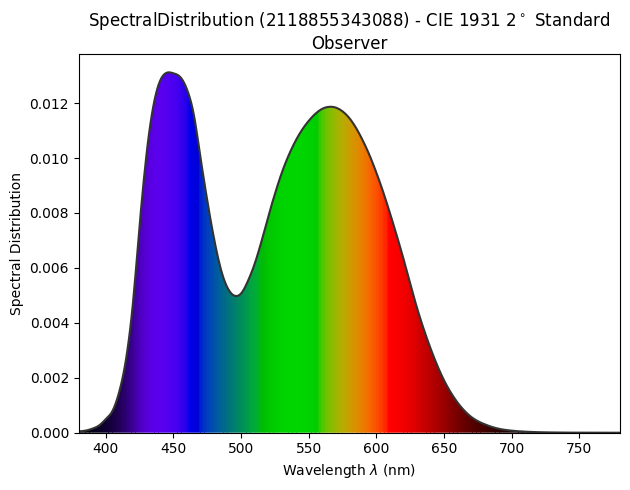

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'SpectralDistribution (2118855343088) - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Spectral Distribution'>)

In [40]:
colour.plotting.plot_single_sd(reconstructed)

In [41]:
sensitivity = np.stack(
    (kodak.cyan_sensitivity.values, kodak.magenta_sensitivity.values, kodak.yellow_sensitivity.values)).T

In [42]:
sensitivity.T @ reconstructed.values

array([  56.13837031,  148.30600911,  178.83533871])

In [43]:
sensitivity.T @ E @ D65_XYZ

array([  56.13837031,  148.30600911,  178.83533871])

In [44]:
middle_gray = colour.xyY_to_XYZ([0.3127, 0.329, 0.18])
middle_gray

array([ 0.17108207,  0.18      ,  0.1960304 ])

In [45]:
target_density = [0.8, 1.2, 1.6]

target_log_exposure = np.array([np.interp(target_density[0], kodak.red_density_curve, kodak.red_log_exposure),
                                np.interp(target_density[1], kodak.green_density_curve, kodak.green_log_exposure),
                                np.interp(target_density[2], kodak.blue_density_curve, kodak.blue_log_exposure), ])
target_exposure = 10 ** target_log_exposure

target_exposure

array([ 0.03210493,  0.02166958,  0.04138414])

In [46]:
film_matrix_prev = (E.T @ sensitivity).T
film_matrix_prev

array([[ 162.79356882,  -72.98426276,  -23.51158997],
       [-117.20118818,  244.28144941,   14.15822407],
       [  13.75858497,  -16.75272491,  167.58627801]])

In [47]:
factors = target_exposure / (film_matrix_prev @ middle_gray)
factors

array([ 0.00317716,  0.00081174,  0.00128561])

In [48]:
film_matrix = (film_matrix_prev.T * factors).T
film_matrix

array([[ 0.51722163, -0.23188287, -0.07470014],
       [-0.09513738,  0.19829403,  0.01149286],
       [ 0.01768813, -0.02153741,  0.21545003]])

In [49]:
film_matrix @ middle_gray

array([ 0.03210493,  0.02166958,  0.04138414])

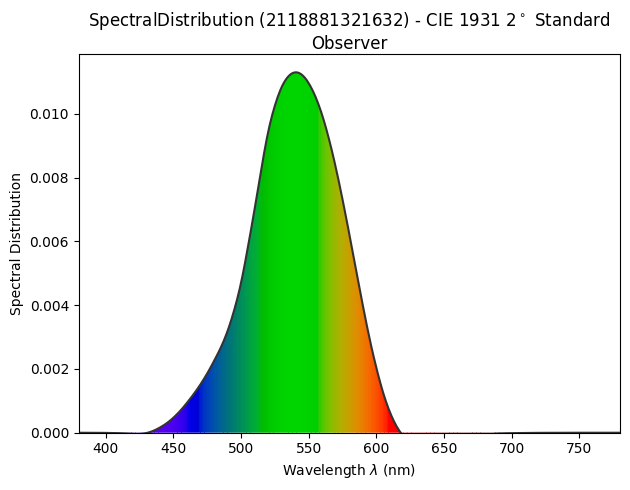

(array([   3.21405396,  134.48660804,   12.91480547]),
 array([   3.21405396,  134.48660804,   12.91480547]),
 array([ 0.01021157,  0.10916872,  0.01660336]))

In [50]:
rgb = (0, 1, 0)
xyz = colour.sRGB_to_XYZ(rgb)
spectrum = colour.SpectralDistribution(E @ xyz, colour.SPECTRAL_SHAPE_DEFAULT)
colour.plotting.plot_single_sd(spectrum)
sensitivity.T @ spectrum.values, film_matrix_prev @ xyz, film_matrix @ xyz


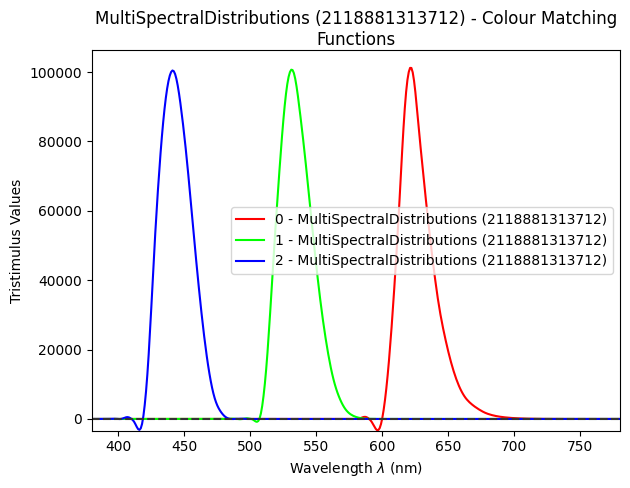

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'MultiSpectralDistributions (2118881313712) - Colour Matching Functions'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Tristimulus Values'>)

In [55]:
status_a_sensitivities = np.array([[-62.232, -29.150, -19.198],
                                   [-59.532, -26.950, -15.398],
                                   [-56.832, -24.750, -11.598],
                                   [-54.132, -22.550, -7.798],
                                   [-51.432, -20.350, -3.998],
                                   [-48.732, -18.150, -0.198],
                                   [-46.032, -15.950, 3.602],
                                   [-43.332, -13.750, 4.819],
                                   [-40.632, -11.550, 5.000],
                                   [-37.932, -9.350, 4.912],
                                   [-35.232, -7.150, 4.620],
                                   [-32.532, -4.950, 4.040],
                                   [-29.832, -2.750, 2.989],
                                   [-27.132, -0.550, 1.566],
                                   [-24.432, 1.650, 0.165],
                                   [-21.732, 3.822, -1.235],
                                   [-19.032, 4.782, -2.635],
                                   [-16.332, 5.000, -4.035],
                                   [-13.632, 4.906, -5.435],
                                   [-10.932, 4.644, -6.835],
                                   [-8.232, 4.221, -8.235],
                                   [-5.532, 3.609, -9.635],
                                   [-2.832, 2.766, -11.035],
                                   [-0.132, 1.579, -12.435],
                                   [2.568, -0.121, -13.835],
                                   [4.638, -1.821, -15.235],
                                   [5.000, -3.521, -16.635],
                                   [4.871, -5.221, -18.035],
                                   [4.604, -6.921, -19.435],
                                   [4.286, -8.621, -20.835],
                                   [3.900, -10.321, -22.235],
                                   [3.551, -12.021, -23.635],
                                   [3.165, -13.721, -25.035],
                                   [2.776, -15.421, -26.435],
                                   [2.383, -17.121, -27.835],
                                   [1.970, -18.821, -29.235],
                                   [1.551, -20.521, -30.635],
                                   [1.141, -22.221, -32.035],
                                   [0.741, -23.921, -33.435],
                                   [0.341, -25.621, -34.835],
                                   [-0.059, -27.321, -36.235],
                                   [-0.459, -29.021, -37.635],
                                   [-0.859, -30.721, -39.035], ])
status_a_sensitivities = 10 ** status_a_sensitivities

status_a_sensitivities = colour.MultiSpectralDistributions(status_a_sensitivities, colour.SpectralShape(360, 780, 10)).align(colour.SPECTRAL_SHAPE_DEFAULT)

colour.plotting.plot_single_cmfs(status_a_sensitivities)